In [2]:
import pandas
import numpy as np
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams["figure.dpi"] = 500
matplotlib.rcParams['savefig.dpi'] = 500

We load the pollination data from a file

In [3]:
pol_data = pandas.read_csv("Pol_LimPodFlwr.csv").dropna()
pol_data

season  plot  tree canopy.light  shading veg.proxy  poll.percent   
0      wet     1     1          nsh        0      cplx             0  \
1      wet     1     2          nsh        0      cplx             0   
2      wet     1     3          nsh        0      cplx             0   
3      wet     1     4          nsh        0      cplx             0   
4      wet     1     5          nsh        0      cplx             0   
..     ...   ...   ...          ...      ...       ...           ...   
571    dry     8     2           sh        1      cplx           100   
572    dry     8     3           sh        1      cplx           100   
573    dry     8     4           sh        1      cplx           100   
574    dry     8     5           sh        1      cplx           100   
575    dry     8     6           sh        1      cplx           100   

     total_pod.no  total.flowers  pod_prop_flwr  
0             4.0             78           5.13  
1             1.0            234           0.43  
2             2.0             37           5.41  
3             2.0            261           0.77  
4             0.0            193           0.00  
..            ...            ...            ...  
571           6.0             41          14.63  
572           2.0            106           1.89  
573           4.0             14          28.57  
574           0.0             96           0.00  
575           1.0             39           2.56  

[574 rows x 10 columns]

In [4]:
np.count_nonzero(np.isnan(pol_data["total_pod.no"]))

0

We create categories for each level of hand-pollination in the data; in this example `[0%, 20%, 40%, 40%, 60%, 80%, 100%]`

In [5]:
poll_percent = np.unique(pol_data["poll.percent"])
buckets = [pol_data["poll.percent"] == b for b in poll_percent]
poll_percent

array([  0,  20,  40,  60,  80, 100])

In [6]:
poll_proportion = poll_percent / 100
poll_proportion

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

We compute the average total number of pods observed at each level of hand-pollination; as well as at natural pollination (in the data, this is recorded as 0% hand-pollination)

In [7]:
average_total_pods = [pol_data["total_pod.no"][b].mean() for b in buckets]
average_total_pods

[1.0833333333333333, 1.6875, 1.96875, 2.28125, 2.765957446808511, 3.71875]

In [8]:
average_natural_total_pods = average_total_pods[0]
average_artificial_total_pods = average_total_pods[1:]
artificial_percent = poll_percent[1:]
artificial_proportion = poll_proportion[1:,np.newaxis]

We plot the hand-pollination proportions against the associated mean total pods

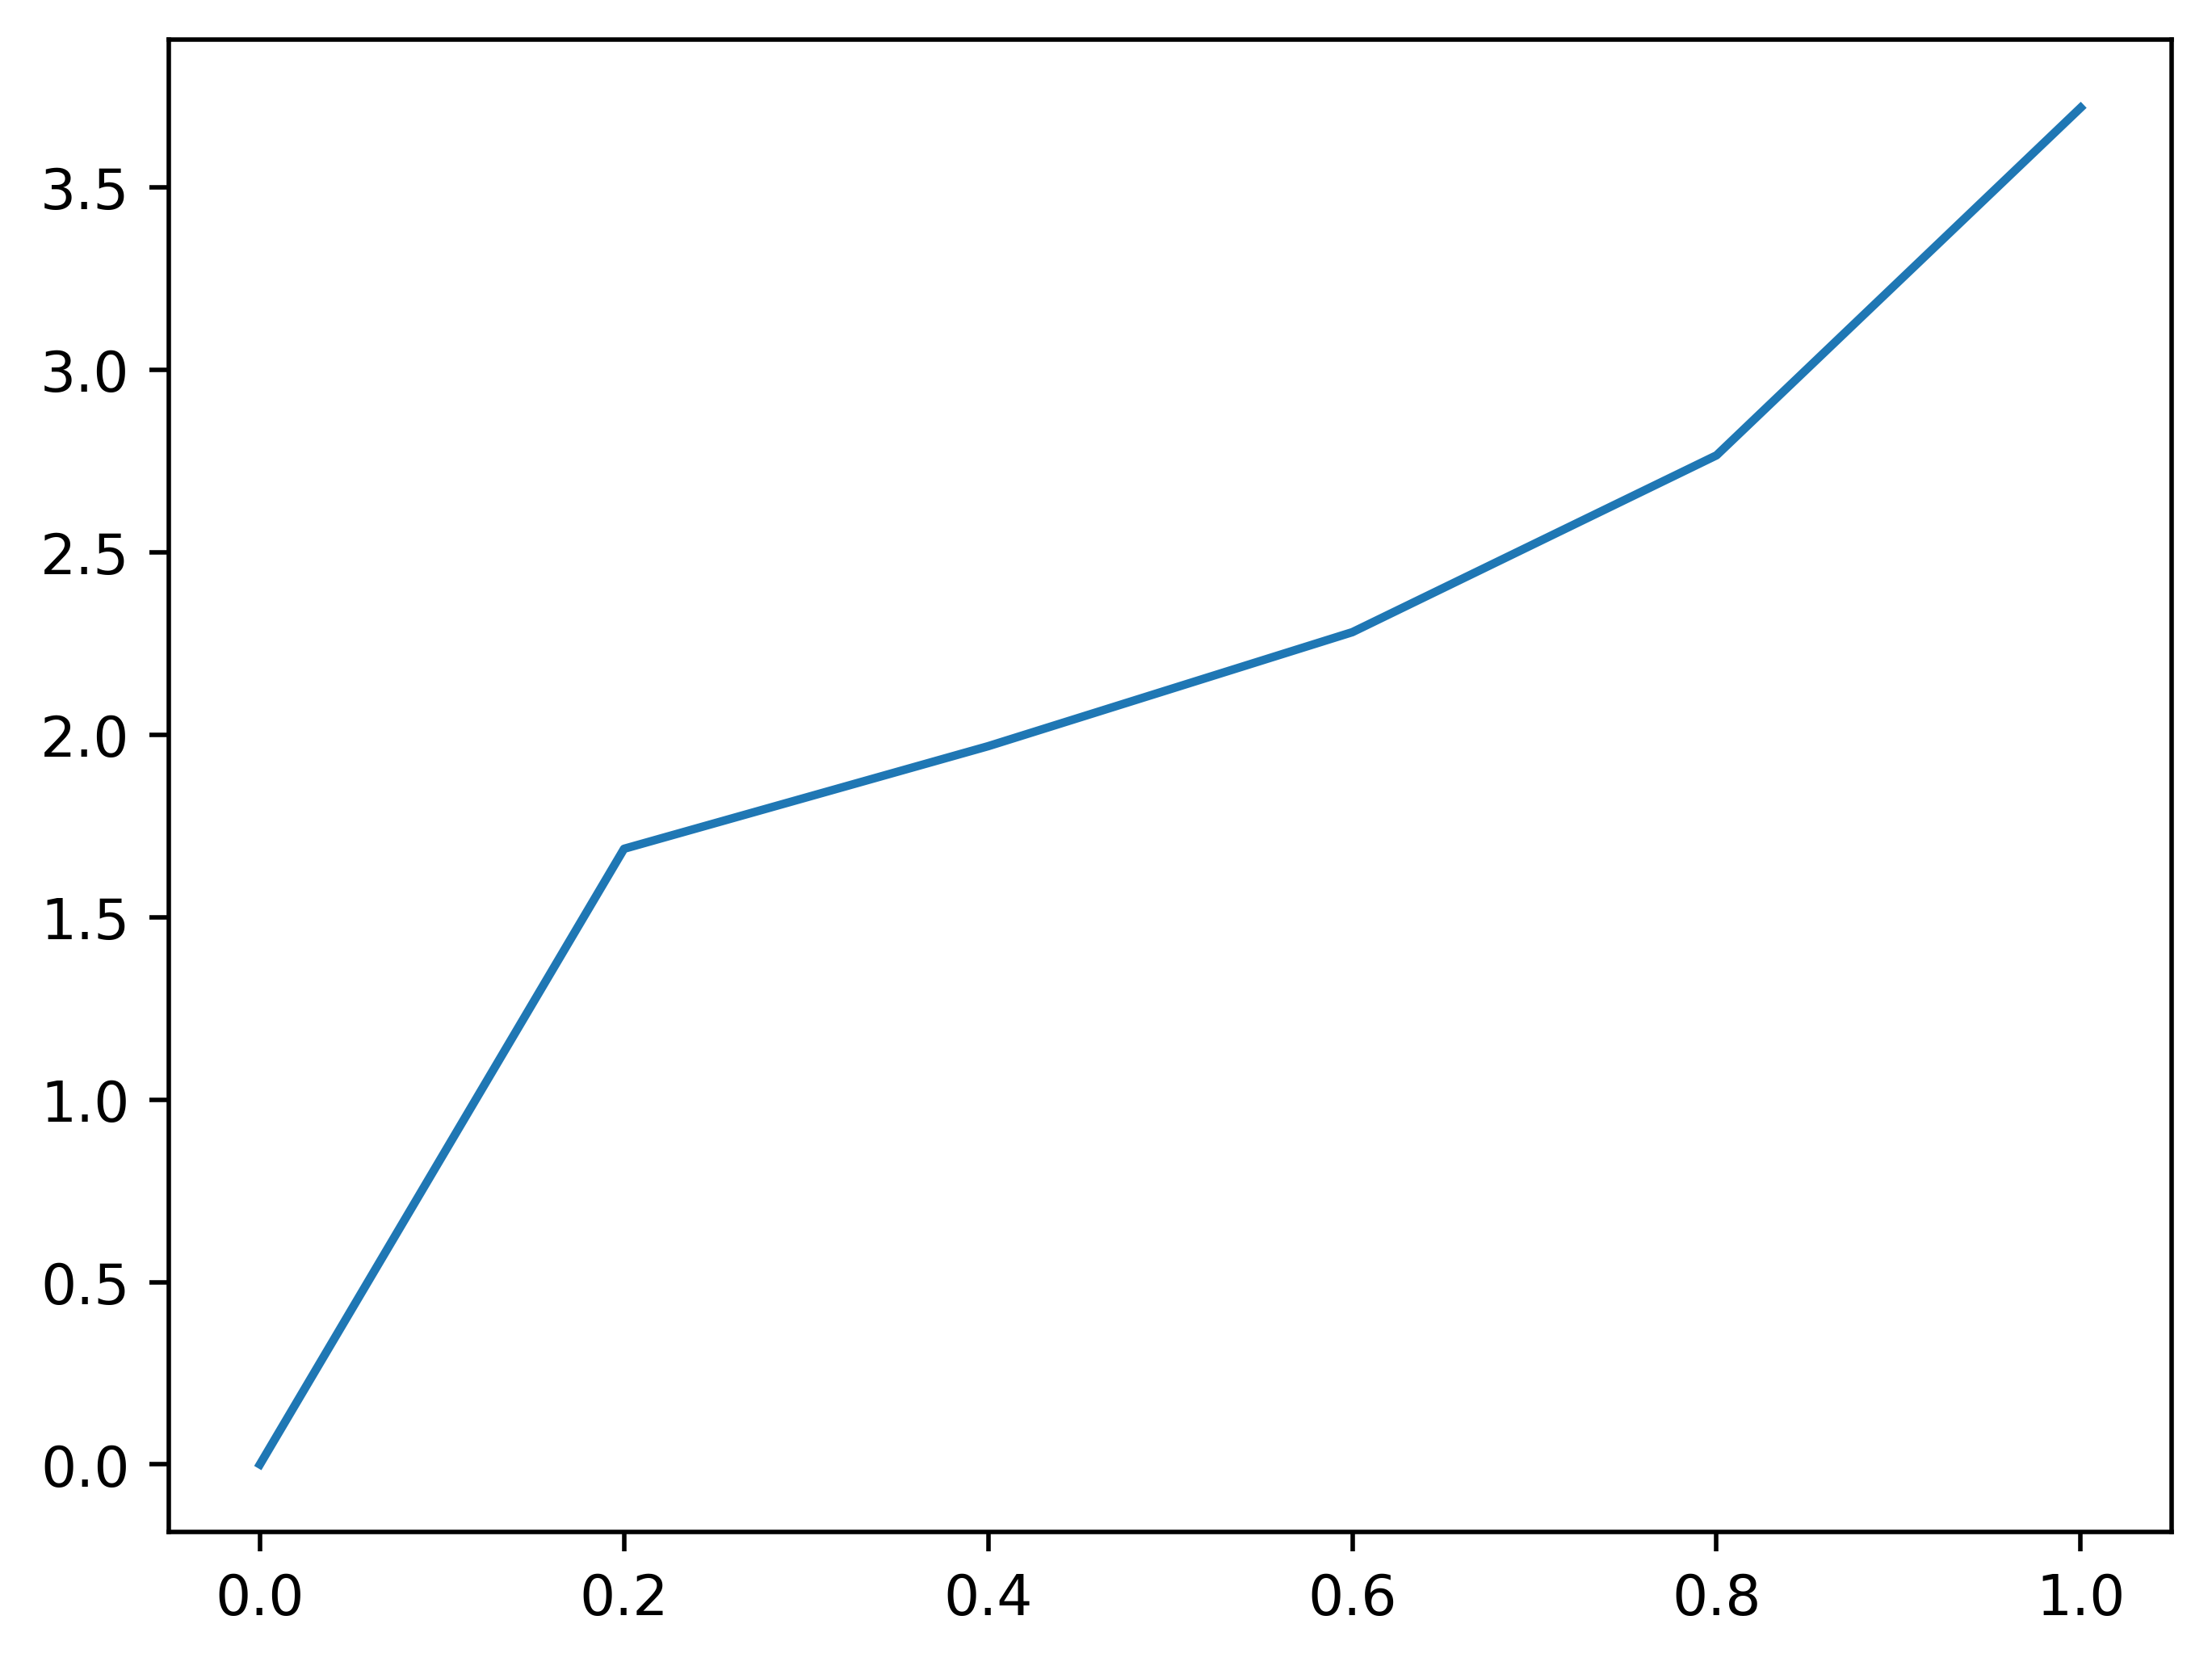

In [9]:
plt.plot(np.insert(artificial_proportion, 0, 0), np.insert(average_artificial_total_pods, 0, 0))
plt.show()

We now attempt to fit a linear relationship between (artificial) pollination level, where we assume that without pollination there will be no flowers (i.e., we assume intercept zero). We then use this to estimate the natural level of pollination

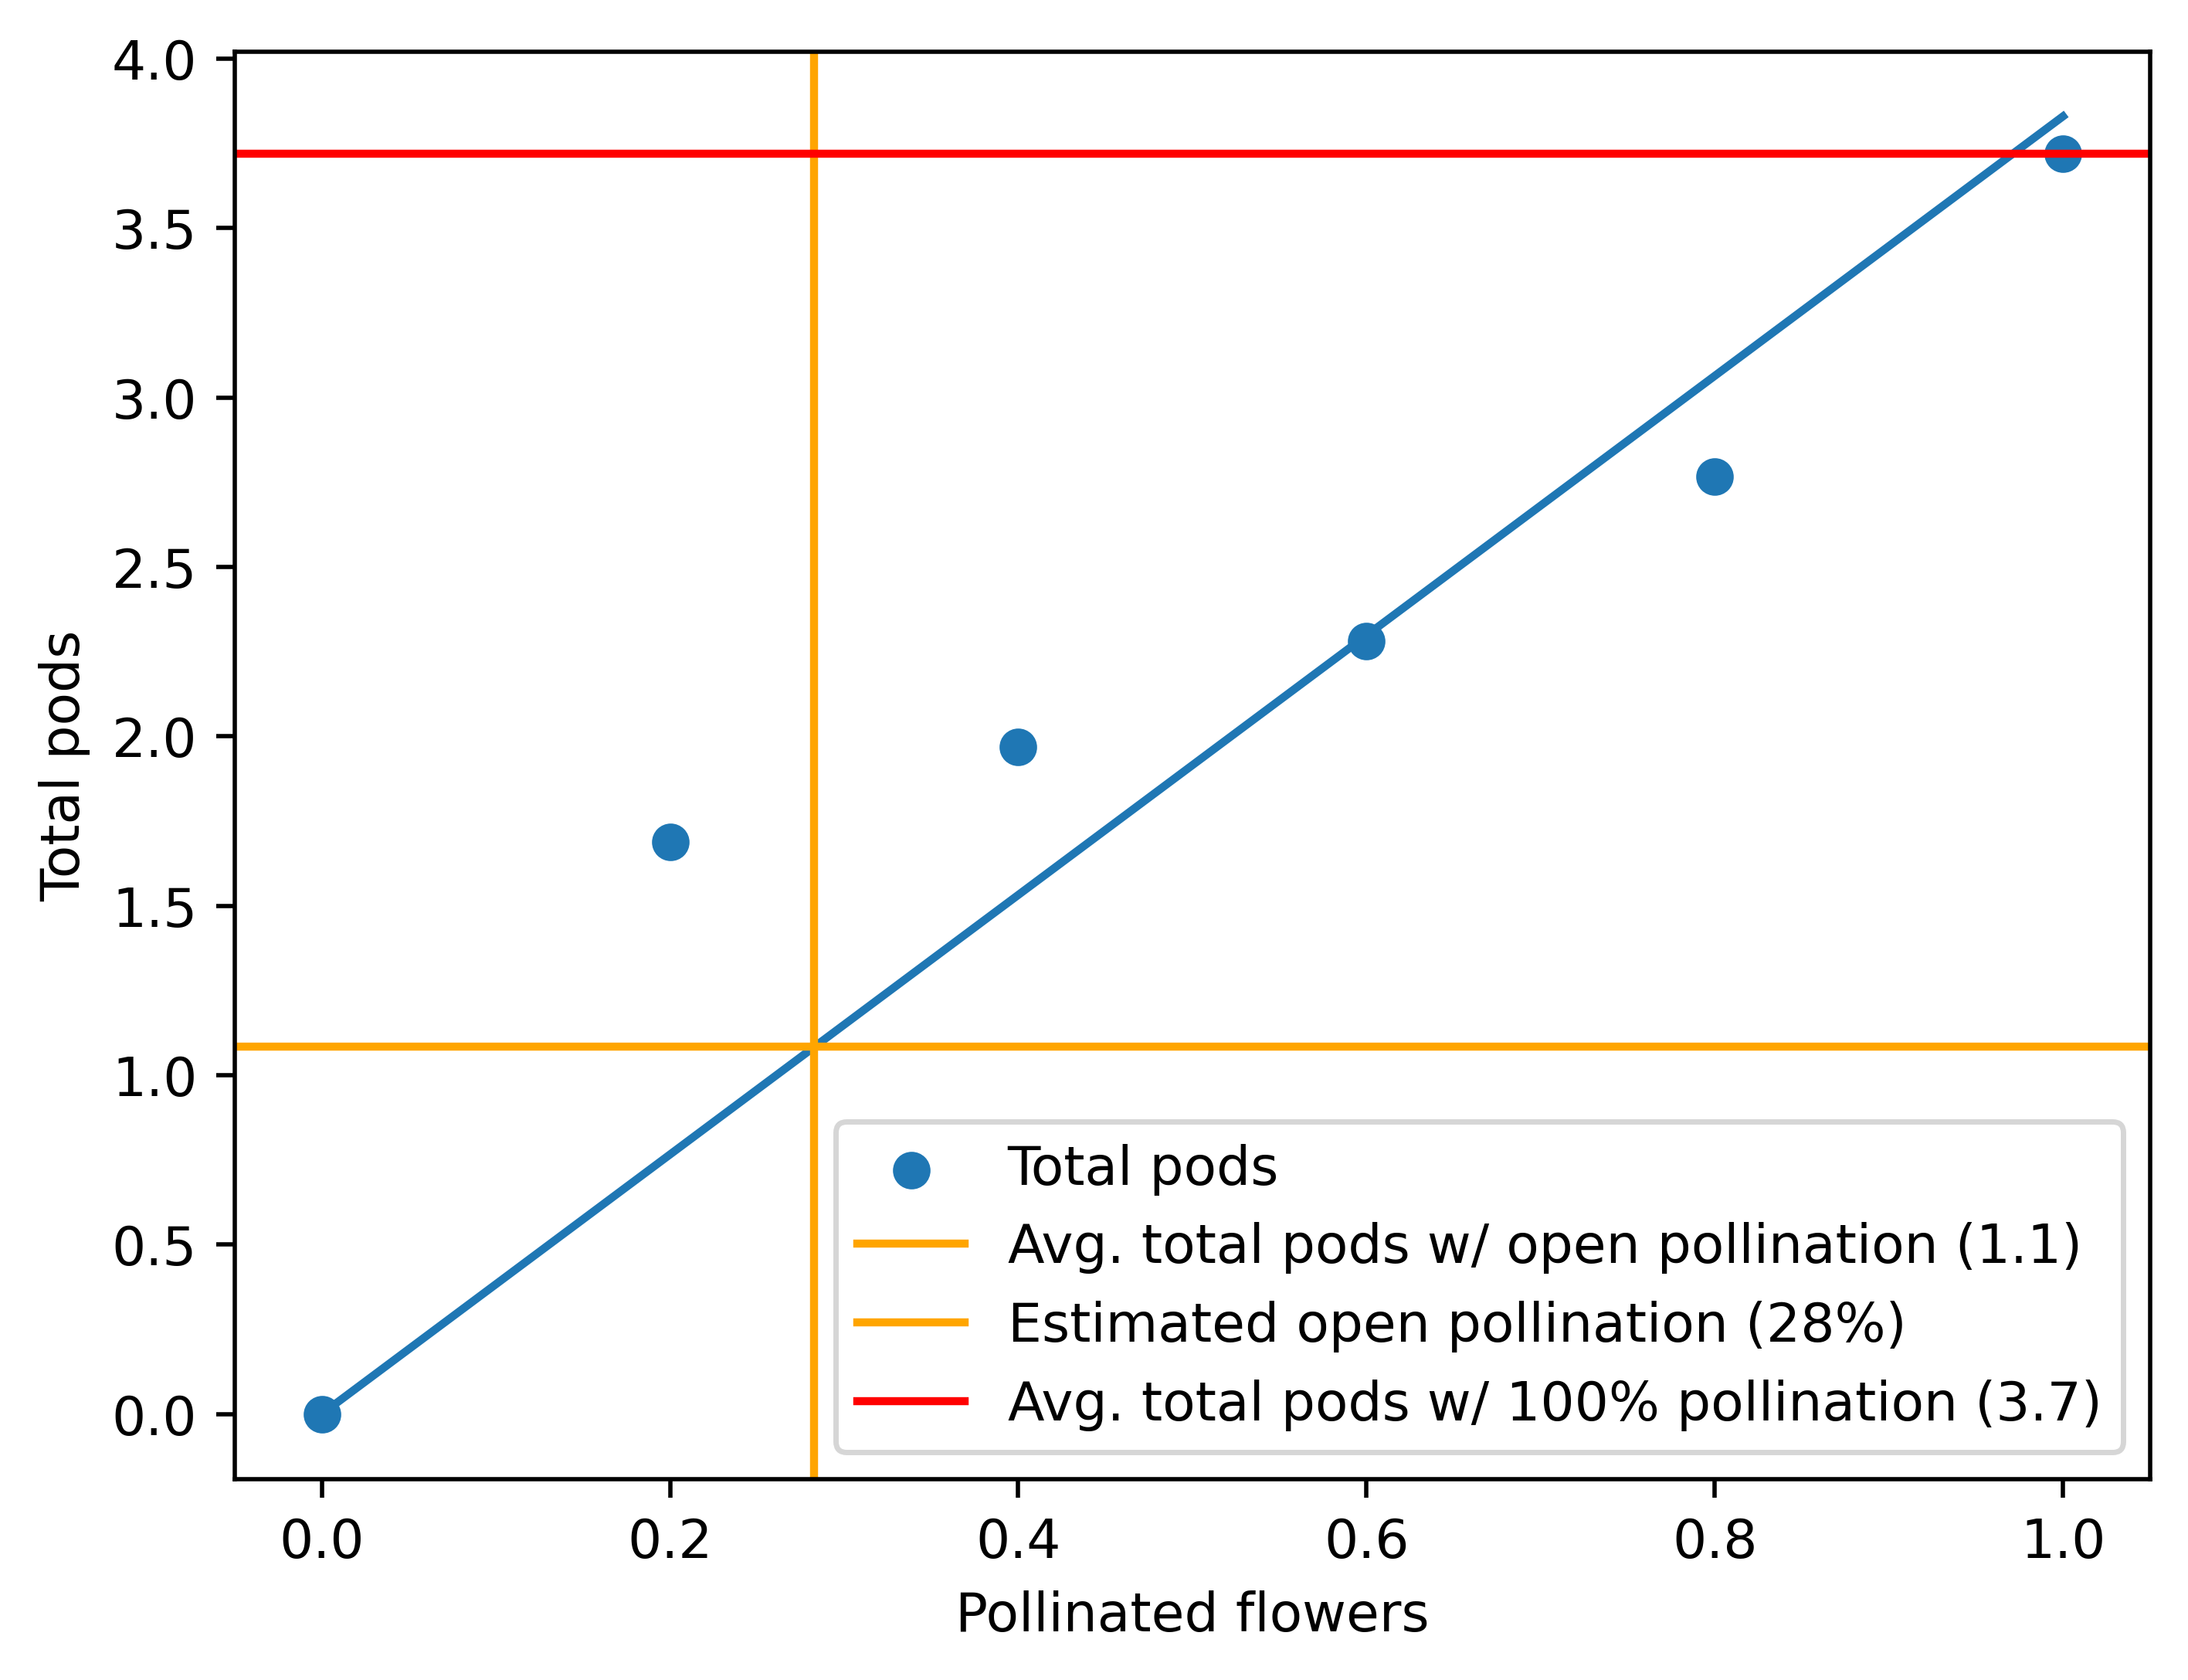

In [34]:
slope, residuals, _, _ = np.linalg.lstsq(artificial_proportion, average_artificial_total_pods, rcond=-1)
avg_error = residuals/len(average_artificial_total_pods)
slope, avg_error
natural_pollination = average_natural_total_pods / slope

yield_gap = (average_artificial_total_pods[-1]  - average_natural_total_pods)/average_artificial_total_pods[-1]
yield_gap

plt.scatter(
    np.insert(artificial_proportion, 0, 0), np.insert(average_artificial_total_pods, 0, 0),
    label="Total pods"
)
plt.plot(
    np.insert(artificial_proportion, 0, 0), np.insert(artificial_proportion, 0, 0)*slope
)
plt.axhline(y = average_natural_total_pods, label = "Avg. total pods w/ open pollination (1.1)", color = "orange")
plt.axvline(x = natural_pollination, label = "Estimated open pollination (28%)", color = "orange")
plt.axhline(y = average_artificial_total_pods[-1], label = "Avg. total pods w/ 100% pollination (3.7)", color = "red")
plt.legend()
plt.xlabel("Pollinated flowers")
plt.ylabel("Total pods")
plt.show()

In [11]:
print(f"natural pollination = {natural_pollination[0] * 100}%")

natural pollination = 28.287929964119247%


We now attempt to estimate pollination another way, by instead doing a regression on the average proportion of pods which bear flowers

In [35]:
yield_gap

0.7086834733893558

In [13]:
average_natural_prop_flwr = average_prop_flwr[0]
average_artificial_prop_flwr = average_prop_flwr[1:]

In [14]:
slope, residuals, _, _ = np.linalg.lstsq(artificial_proportion, average_artificial_prop_flwr, rcond=-1)
avg_error = residuals/len(average_artificial_prop_flwr)
slope, avg_error

(array([0.04479288]), array([3.92489488e-05]))

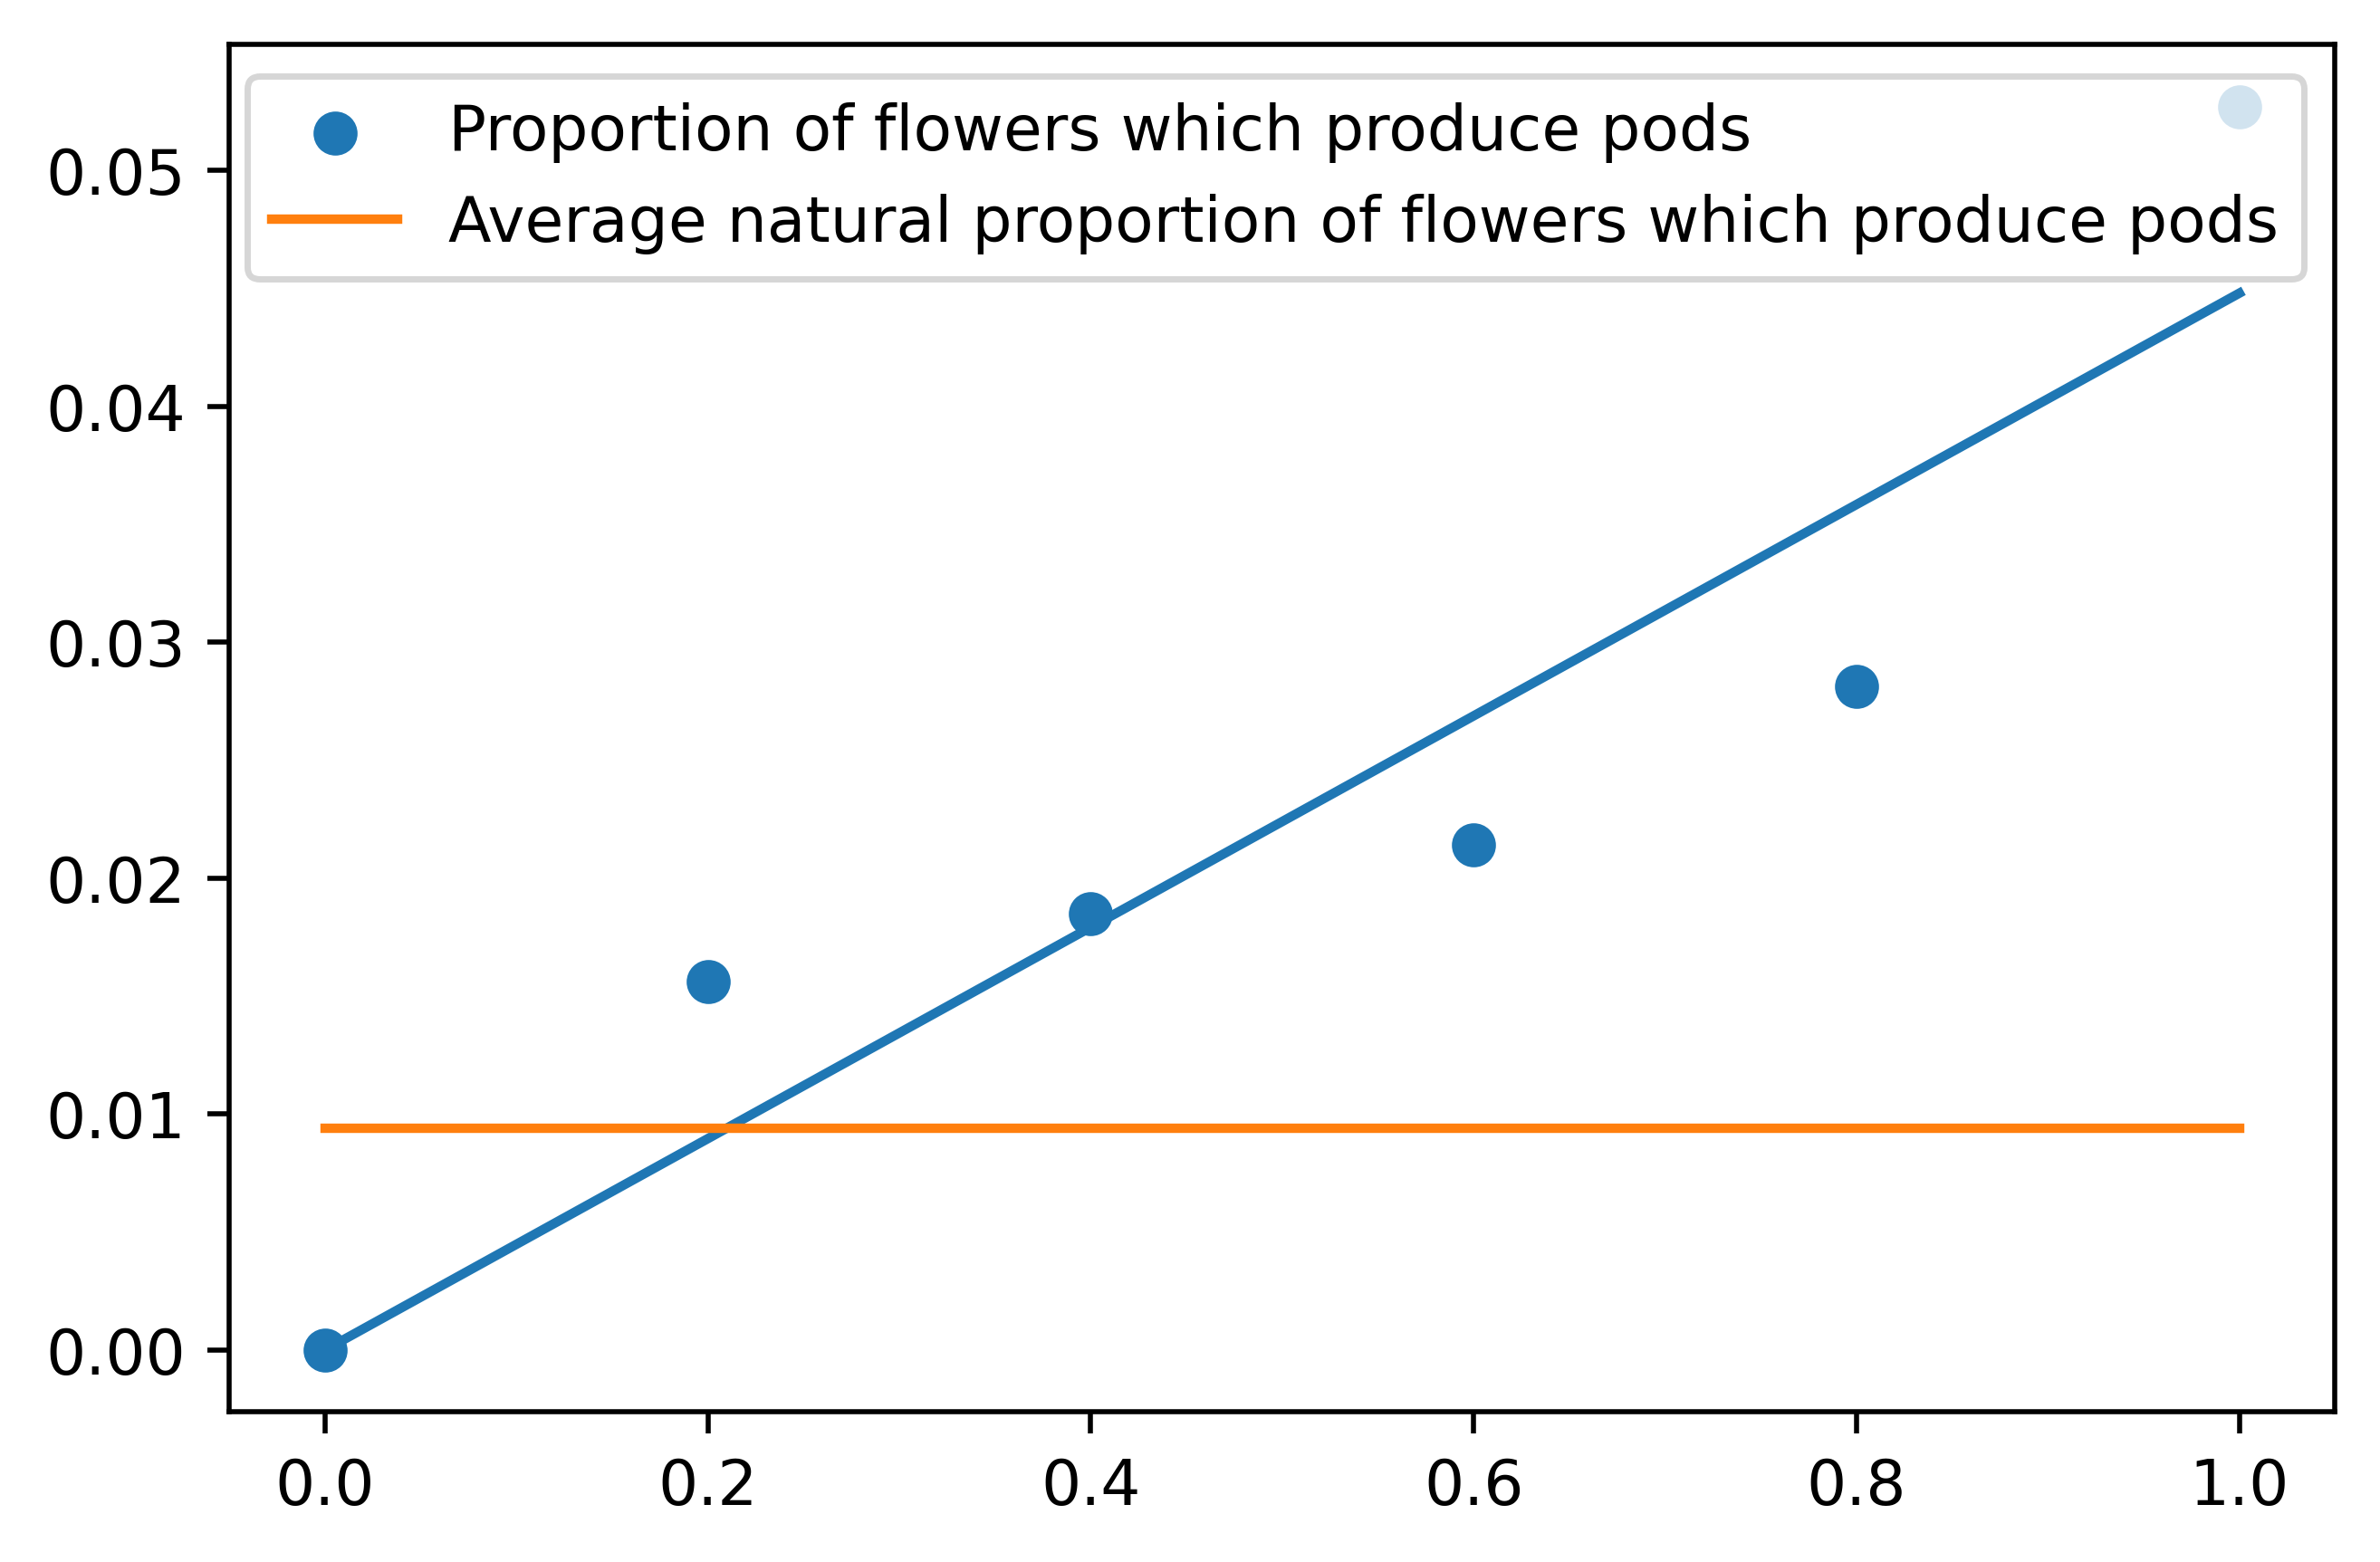

In [15]:
plt.scatter(
    np.insert(artificial_proportion, 0, 0), np.insert(average_artificial_prop_flwr, 0, 0),
    label="Proportion of flowers which produce pods"
)
plt.plot(
    np.insert(artificial_proportion, 0, 0), np.insert(artificial_proportion, 0, 0)*slope
)
plt.plot(
    np.insert(artificial_proportion, 0, 0), [average_natural_prop_flwr for _ in range(0, (len(artificial_proportion) + 1))],
    label="Average natural proportion of flowers which produce pods"
)
plt.legend()
plt.show()

In [16]:
natural_pollination = average_natural_prop_flwr / slope
print(f"natural pollination = {natural_pollination * 100}%")

natural pollination = [20.97152702]%


In [17]:
average_prop_pol_flwr = np.array([(pol_data["pod_prop_flwr"][b] / pol_data["poll.percent"][b]).mean() for b in buckets[1:]])
average_prop_pol_flwr

array([0.07802604, 0.04619792, 0.0357066 , 0.03513697, 0.05268958])

We now try plotting the proportion of pollinated flowers bearing fruit

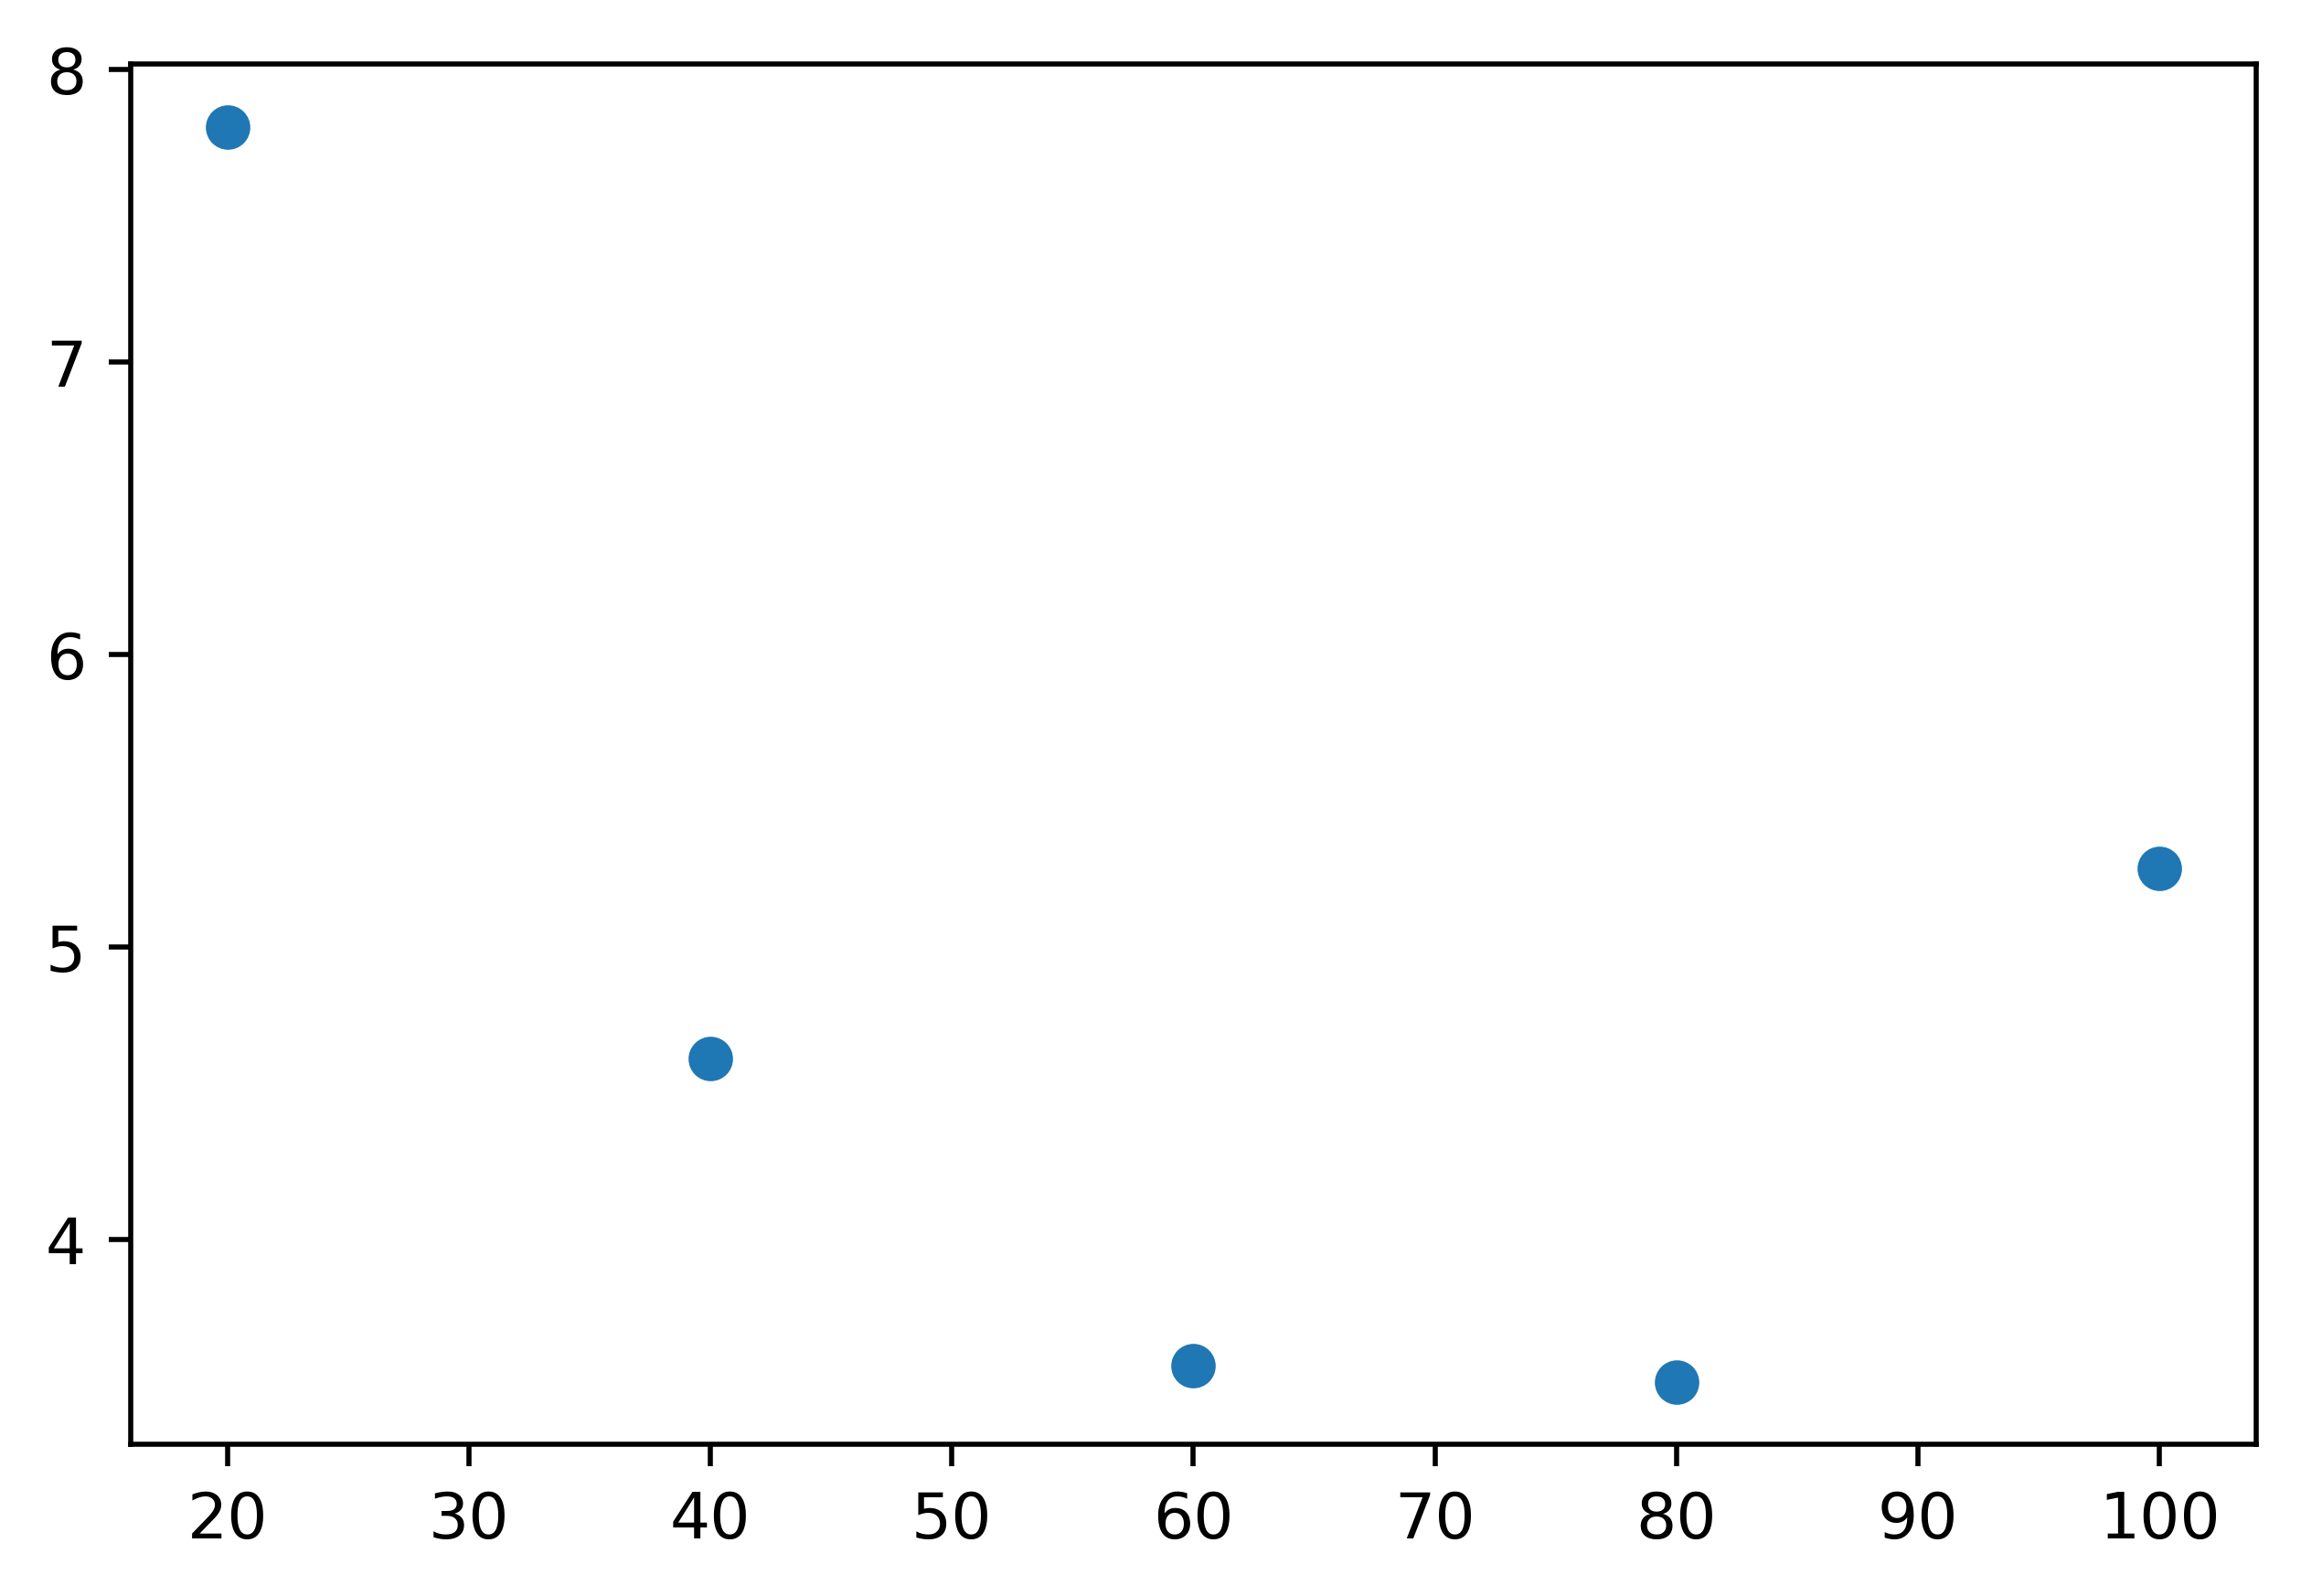

In [18]:
plt.scatter(artificial_proportion*100, average_prop_pol_flwr*100)

In [19]:
prop_pol_flwr = [pol_data["pod_prop_flwr"][b] / pol_data["poll.percent"][b] for b in buckets[1:]]
prop_pol_flwr

[48     0.0855
 49     0.0960
 50     0.3000
 51     0.1495
 52     0.0595
         ...  
 379    0.1370
 380    0.0000
 381    0.0000
 382    0.0000
 383    0.0380
 Length: 96, dtype: float64,
 96     0.00000
 97     0.00000
 98     0.00000
 99     0.00000
 100    0.02825
         ...   
 427    0.01925
 428    0.13150
 429    0.09000
 430    0.05950
 431    0.00000
 Length: 96, dtype: float64,
 144    0.000000
 145    0.039167
 146    0.000000
 147    0.034333
 148    0.000000
          ...   
 475    0.430167
 476    0.012667
 477    0.125000
 478    0.045000
 479    0.000000
 Length: 96, dtype: float64,
 192    0.050000
 193    0.071375
 194    0.026750
 195    0.171625
 196    0.051375
          ...   
 523    0.043125
 524    0.021125
 525    0.011250
 526    0.069500
 527    0.011000
 Length: 94, dtype: float64,
 240    0.0303
 241    0.0313
 242    0.0207
 243    0.0513
 244    0.1746
         ...  
 571    0.1463
 572    0.0189
 573    0.2857
 574    0.0000
 575    0.0256
 Len

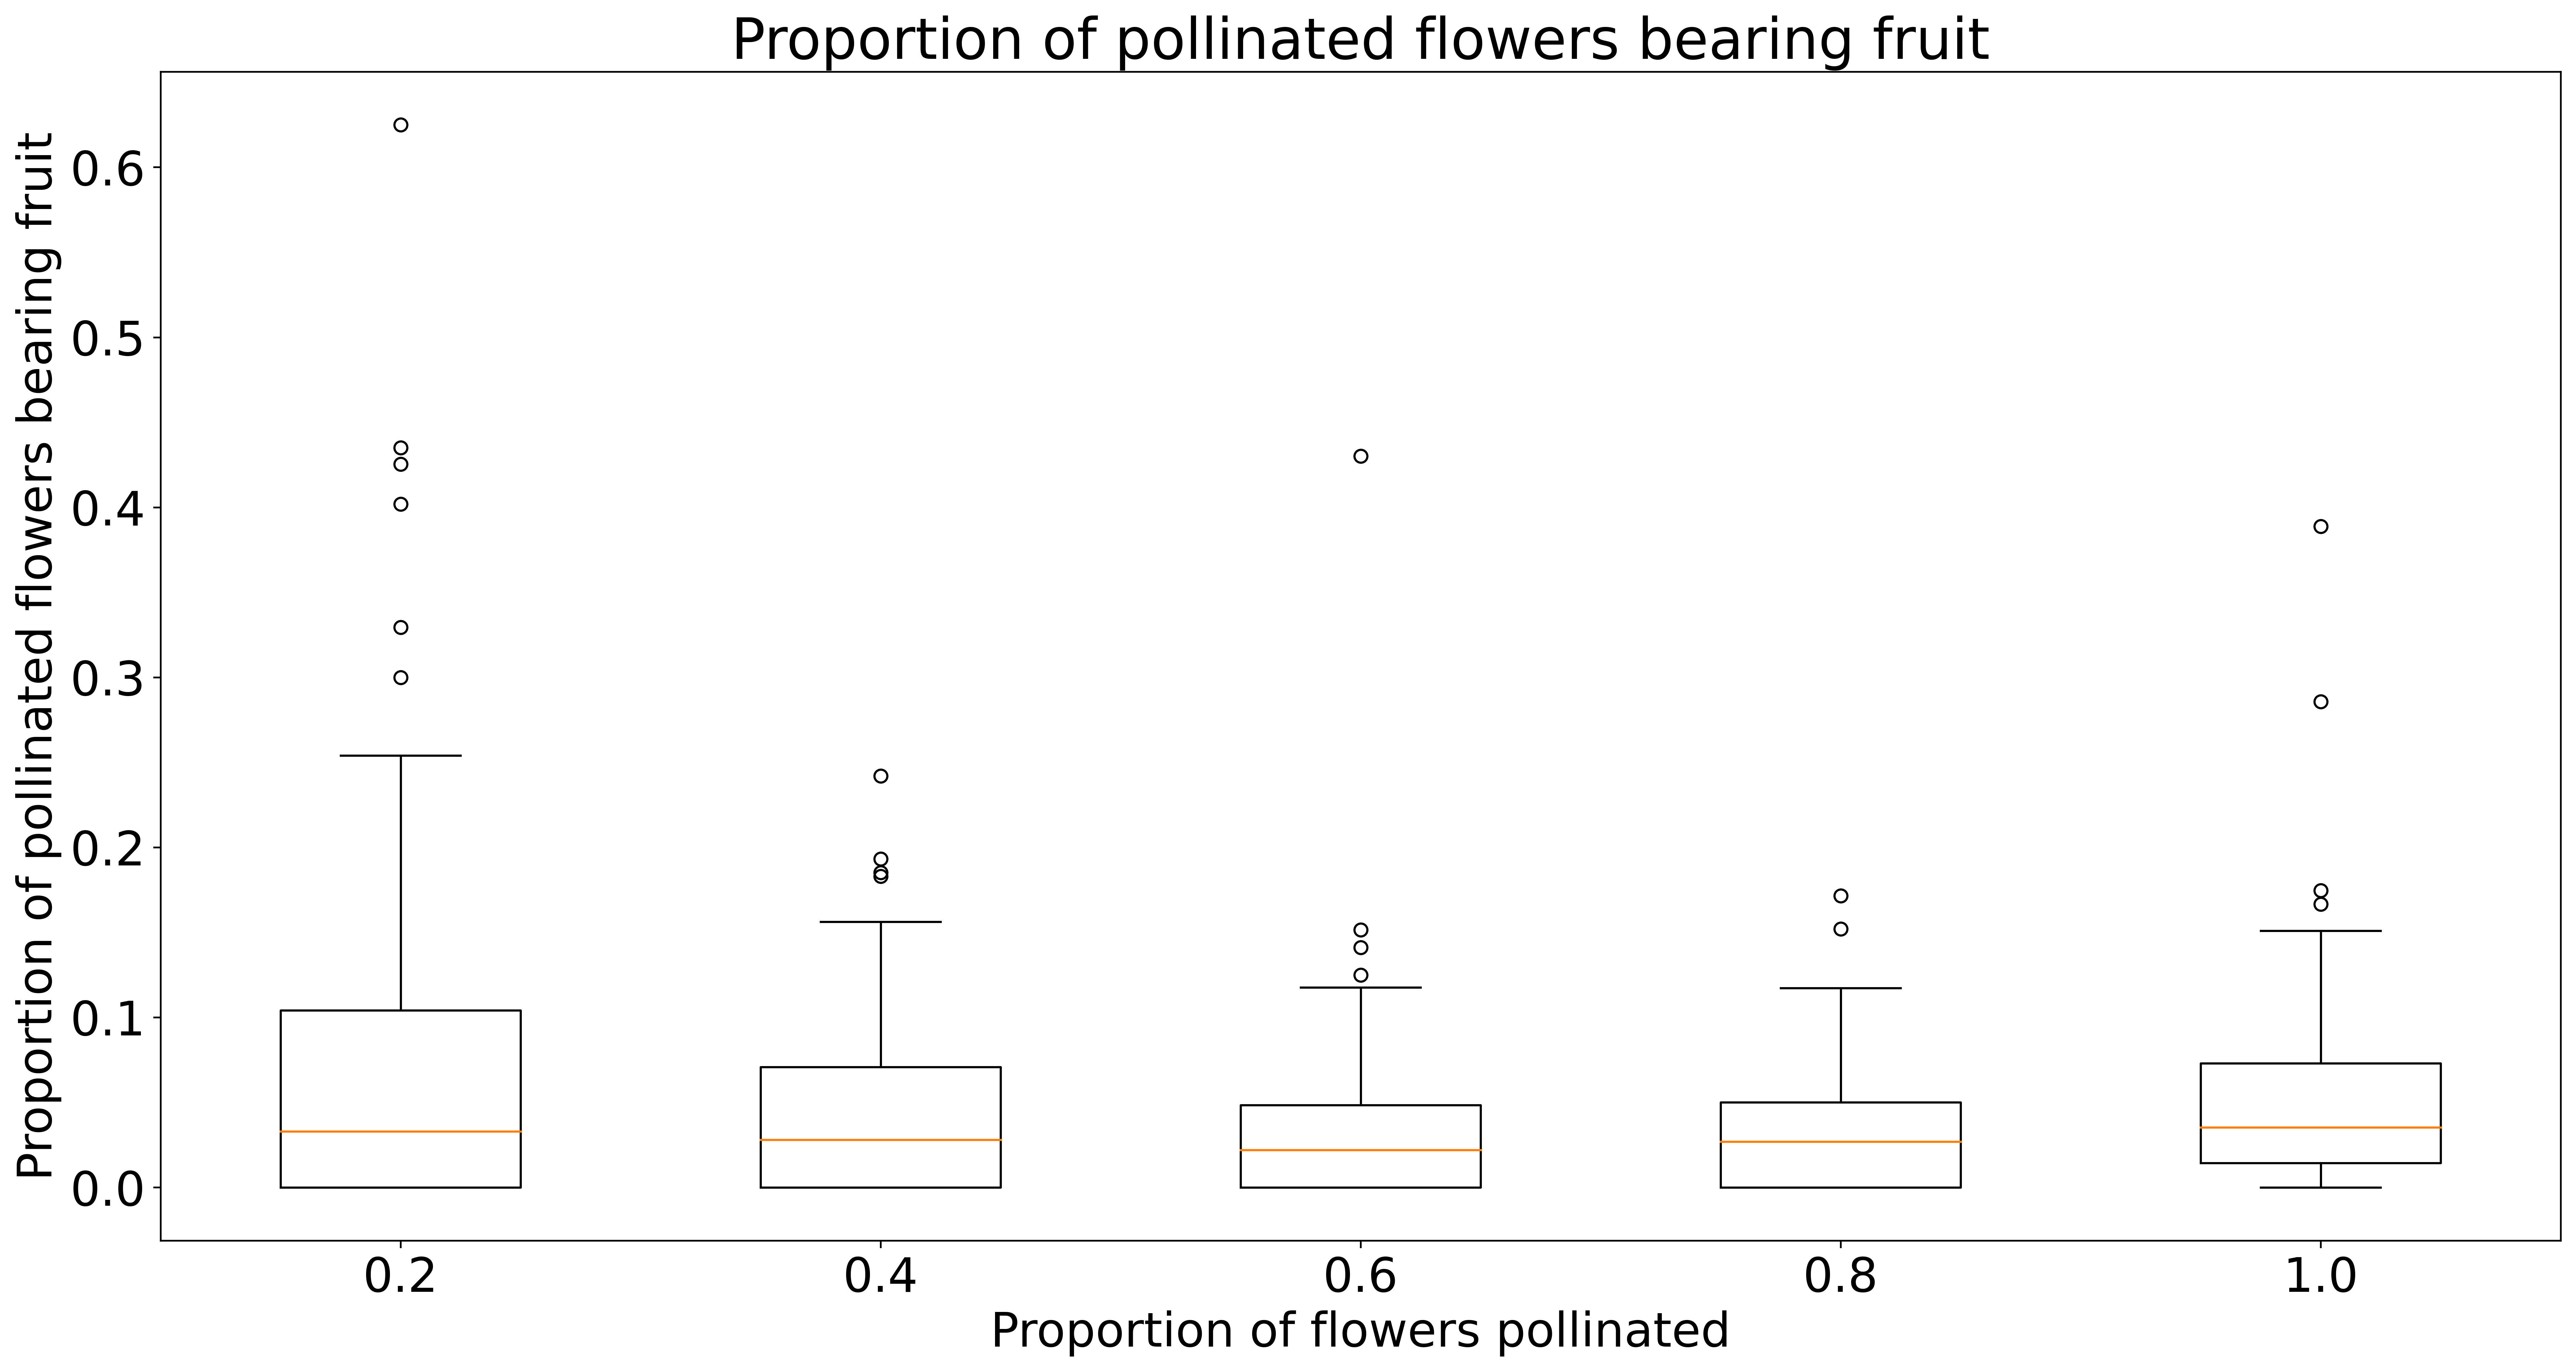

In [20]:
plt.rcParams.update({'font.size': 22})
fig7, ax7 = plt.subplots(figsize=(20, 10))
ax7.set_title('Proportion of pollinated flowers bearing fruit')
ax7.set_xlabel('Proportion of flowers pollinated')
ax7.set_ylabel('Proportion of pollinated flowers bearing fruit')
ax7.boxplot(prop_pol_flwr, labels=[str(p[0]) for p in artificial_proportion])

plt.show()

In [21]:
average_prop_pol_flwr = np.array([(pol_data["pod_prop_flwr"][b] / pol_data["poll.percent"][b]).mean() for b in buckets[1:]])
average_prop_pol_flwr

array([0.07802604, 0.04619792, 0.0357066 , 0.03513697, 0.05268958])

In [37]:
df = pandas.DataFrame(data={
    'prop_pol_pods': list(prop_pol_flwr[0]) + list(prop_pol_flwr[1]) + list(prop_pol_flwr[2]) + list(prop_pol_flwr[3]) + list(prop_pol_flwr[4]),
    'prop_pol': [0.2 for _ in prop_pol_flwr[0]] + [0.4 for _ in prop_pol_flwr[1]] + [0.6 for _ in prop_pol_flwr[2]] + [0.8 for _ in prop_pol_flwr[3]] + [1.0 for _ in prop_pol_flwr[4]]
})

In [38]:
df

prop_pol_pods  prop_pol
0           0.0855       0.2
1           0.0960       0.2
2           0.3000       0.2
3           0.1495       0.2
4           0.0595       0.2
..             ...       ...
473         0.1463       1.0
474         0.0189       1.0
475         0.2857       1.0
476         0.0000       1.0
477         0.0256       1.0

[478 rows x 2 columns]

In [39]:
df.to_csv("prop_pol.csv")